**DATA NARRATIVE**

**Recession Prediction**

**Team : transformers-stock-market-prediction**

Team Members: 

*   Amrutha Singh Balaji Singh
*   Anand Muralidhara
*   Snehal Yeole
*   Poorva Agarwal


**Tasks**

1. Data preparation and analysis - Anand
2. Apply Linear Regression and predicting result before data enrichment - Poorva
3. Data Enrichment and Data Cleaning - Snehal
4. Apply Linear Regression and predicting result post data enrichment - Amrutha
5. Identify Latent Manifold - **Entire team**
6. Use the manifold to add features to the dataset and run regression based on those new features - **Entire team**



**Machine Learning Lifecycle:**
 
* Configuration of the System : Google Colab. 

Dataset is uploaded on the team folder on Drive - 

https://drive.google.com/file/d/1GD2bti19qfpow2QfkjQFeaFq1zfy-5UH/view?usp=sharing

https://drive.google.com/file/d/1fbDcFcxbqyuX3H_1Ea9gSOWkrobPkdBb/view?usp=sharing

**Business Objective:** The main objective of this project is to predict the bubble formation and next recession based on several factors such as yields on short-and long-term maturity bonds, NASDAQ index and Unemployment rate. These factors are the strong indicators in determining the probability of an upcoming recession.

**Dataset:** We are using dataset with NASDAQ, Unemployment rate and Yield curve with the difference of 10-year and 2 year treasury notes (The column T10Y2Y in the dataset stands for 10-Year Treasury Constant Maturity and 2-Year Treasury Constant Maturity). For the purpose of this assignment, I am going to consider Unemployment and Yield curve which are strong indicators for bubble prediction.

The dataset can be found on the common google drive under “transformers-stock-market-prediction” folder.

Multiple factors were considered for Data Collection - NASDAQ, YIELD curve, GDP and UNEMPLOYMENT. Since NASDAQ is a good predcitor of recession. We are planning to predict NASDAQ using the remaining three factors i.e GDP, UNEMPLOYMENT and YIELD curve. The dataset for these factors were extracted from - 

https://fred.stlouisfed.org/series/FEDFUNDS 

https://fred.stlouisfed.org/series/NASDAQCOM

https://fred.stlouisfed.org/series/GDPC1

https://fred.stlouisfed.org/series/UNEMPLOY

All the factors can be found in the dataset - 

https://drive.google.com/file/d/1GD2bti19qfpow2QfkjQFeaFq1zfy-5UH/view?usp=sharing

**Link of dataset on drive:**

https://drive.google.com/file/d/1GD2bti19qfpow2QfkjQFeaFq1zfy-5UH/view?usp=sharing

**Data Interpretation:** Initially our dataset included NASDAQ, UNEMPLOYMENT and YIELD curve values, since these are strong indicators of recession. The yield curve values represented that long term investment (10 year) is lower than the yield on short term investment (2 year) Real GDP - Growth rate less than 2% indicates Bubble formation and less than 0% or negative values indicate Recession period.

In the previous Assignment of unsupervised learning, we applied K means and GMM clustering algorithm to get clusters and we noticed that we got clusters in the form of positive and negative values. The negative values represented recession.

The data interpretation derived after applying unsupervised clustering algorithms on Yield curve and Unemployment rate in the data set is - The unemployment rate grows as the yeild curve grows and the unemployment rate decreases as the yeild curve decreases.
We added the above column 'RECESSION' to our dataset. 

 
**New Insights:** In addition to Nasdaq and Yield curve, the unemployment rate is also a strong indicator for bubble prediction.


**Code snippet to mount the google drive on colab**


In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Mention the location of your dataset on google drive**

In [194]:
cd '/content/drive/My Drive/DataSets'

/content/drive/My Drive/DataSets


**Importing required libraries for clustering**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

**Code to read the recession factors dataset csv file and print the first few records**

In [196]:
data_records = pd.read_csv("/content/drive/My Drive/DataSets/nasdaq-unemploy-gdp-yield-quarterly.csv", sep=',', usecols=['DATE','NASDAQ','UNEMPLOY','YIELD'])
data_records.head()

,DATE,NASDAQ,YIELD,UNEMPLOY
0,7/1/1976,91.235625,187.83026,7462.666667
1,10/1/1976,91.274127,250.63286,7531.666667
2,1/1/1977,96.217460,227.54796,7343.333333
3,4/1/1977,96.650317,213.20591,7034.666667
4,7/1/1977,100.756191,139.16403,6835.000000


**Print entire records from recession dataset**


In [197]:
data_records

,DATE,NASDAQ,YIELD,UNEMPLOY
0,7/1/1976,91.235625,187.83026,7462.666667
1,10/1/1976,91.274127,250.63286,7531.666667
2,1/1/1977,96.217460,227.54796,7343.333333
3,4/1/1977,96.650317,213.20591,7034.666667
4,7/1/1977,100.756191,139.16403,6835.000000
5,10/1/1977,101.216508,77.68704,6654.666667
6,1/1/1978,102.436452,79.66154,6381.333333
7,4/1/1978,117.489531,54.87395,6111.666667
8,7/1/1978,130.087143,2.84672,6171.333333
9,10/1/1978,119.848413,-86.82968,6084.000000


**Code to read the GDP factor dataset csv file and print the first few records**

In [198]:
data_gdp_records = pd.read_csv("/content/drive/My Drive/DataSets/gdp-data.csv", sep=',', usecols=['GDP'])
data_gdp_records.head()

,GDP
0,5965.265
1,6008.504
2,6079.494
3,6197.686
4,6309.514


**Print entire records from GDP dataset**

In [199]:
data_gdp_records

,GDP
0,5965.265
1,6008.504
2,6079.494
3,6197.686
4,6309.514
5,6309.652
6,6329.791
7,6574.390
8,6640.497
9,6729.755


**Data Preparation step:**


Pre-process the data in recession dataset in order to fill any missing or incomplete records

**Step 1:** Calculate the median of 'UNEMPLOY' attribute - using math module to round the decimal value of median

**Latent Manifold**:


Based on the  values as shown above in each column, the three important features are Yield, Unemployment and Nasdaq. So, our latent variable (GDP) is a resultant variable which is derived from some combination of these features.


In [200]:
import math
median_unemploy = math.floor(data_records.UNEMPLOY.median())
median_unemploy

7852

**Step 2:** Fill all the NA values with the median of 'UNEMPLOY' attribute

In [201]:
data_records.UNEMPLOY.fillna(median_unemploy)

0       7462.666667
1       7531.666667
2       7343.333333
3       7034.666667
4       6835.000000
5       6654.666667
6       6381.333333
7       6111.666667
8       6171.333333
9       6084.000000
10      6130.333333
11      5956.000000
12      6168.666667
13      6286.333333
14      6704.666667
15      7813.333333
16      8221.666667
17      7943.000000
18      8034.666667
19      8047.000000
20      8043.000000
21      8980.666667
22      9665.666667
23     10372.333330
24     10982.333330
25     11839.333330
26     11495.666670
27     11222.666670
28     10484.333330
29      9572.333333
           ...     
142    12774.333330
143    12666.000000
144    12414.000000
145    12142.333330
146    12036.666670
147    11721.666670
148    11294.666670
149    10775.666670
150    10310.333330
151     9673.666667
152     9489.666667
153     8932.333333
154     8672.333333
155     8529.666667
156     8025.333333
157     7943.000000
158     7817.333333
159     7783.000000
160     7816.666667


**Step 3:** Assign the new value (in place of empty cell) to the original dataset

In [202]:
data_records.UNEMPLOY = data_records.UNEMPLOY.fillna(median_unemploy)
data_records     #Print the dataset with updated value

,DATE,NASDAQ,YIELD,UNEMPLOY
0,7/1/1976,91.235625,187.83026,7462.666667
1,10/1/1976,91.274127,250.63286,7531.666667
2,1/1/1977,96.217460,227.54796,7343.333333
3,4/1/1977,96.650317,213.20591,7034.666667
4,7/1/1977,100.756191,139.16403,6835.000000
5,10/1/1977,101.216508,77.68704,6654.666667
6,1/1/1978,102.436452,79.66154,6381.333333
7,4/1/1978,117.489531,54.87395,6111.666667
8,7/1/1978,130.087143,2.84672,6171.333333
9,10/1/1978,119.848413,-86.82968,6084.000000


**Step 4:** Scale the data

In [0]:
scaler = MinMaxScaler()
scaler.fit(data_records.NASDAQ.values.reshape(-1,1))
data_records.NASDAQ = scaler.transform(data_records.NASDAQ.values.reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit(data_records.UNEMPLOY.values.reshape(-1,1))
data_records.UNEMPLOY = scaler.transform(data_records.UNEMPLOY.values.reshape(-1,1))

scaler = MinMaxScaler()
scaler.fit(data_records.YIELD.values.reshape(-1,1))
data_records.YIELD = scaler.transform(data_records.YIELD.values.reshape(-1,1))


**Simple plotting of the data** 

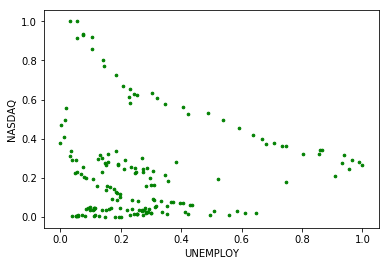

In [204]:
f1 = data_records['UNEMPLOY'].values
f2 = data_records['NASDAQ'].values

plt.xlabel('UNEMPLOY')                    #label on x-axis
plt.ylabel('NASDAQ')                      #label on y-axis
plt.scatter(f1, f2, c='green', s=7)
plt.show()

**Applying K-means on the selected attributes from dataset**

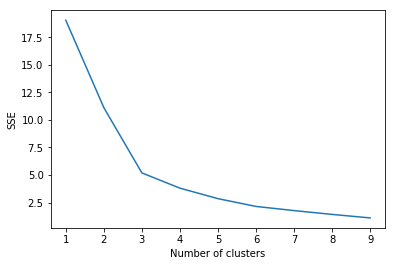

In [205]:
X = np.matrix(list(zip(f1, f2)))
sse = {}
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k, max_iter=15).fit(X)
  sse[k] = kmeans.inertia_ #Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

From the above figure, it is clear that the optimal k=number of clusters is 3

**Apply k-means and plot the data for visualization**

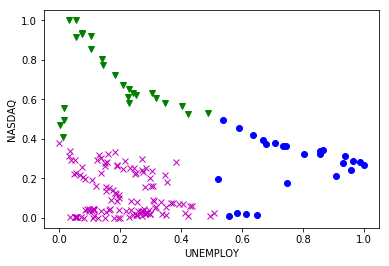

In [206]:
M=np.matrix(list(zip(f1, f2)))
kmeans = KMeans(n_clusters=3, max_iter=15).fit(M)
y_pred = kmeans.predict(M)

colors = ['b', 'g', 'm', 'y', 'c']
markers = ['o', 'v', 'x', 'o', 's']

plt.xlabel('UNEMPLOY')
plt.ylabel('NASDAQ')
for i, l in enumerate(kmeans.labels_):
    plt.plot(f1[i], f2[i], color=colors[l], marker=markers[l],ls='None')

**Apply Gaussian Mixture Model (GMM) on selected attributes of the dataset**

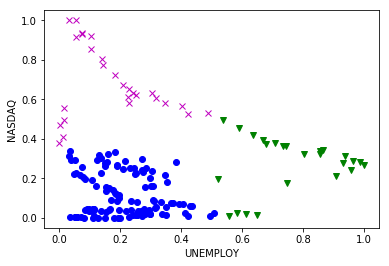

In [207]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.mixture import GaussianMixture
M=np.matrix(list(zip(f1, f2)))
gmm = GaussianMixture(n_components=3,  covariance_type='spherical', random_state=0).fit(M)
labels = gmm.predict(M)

plt.xlabel('UNEMPLOY')
plt.ylabel('NASDAQ')

for i, l in enumerate(labels):
    plt.plot(f1[i], f2[i], color=colors[l], marker=markers[l],ls='None')

**Load the stock data from recession dataset on which Linear Regression will be applied**

In [208]:
stock_reg_data = data_records[['DATE','NASDAQ','UNEMPLOY','YIELD']]
stock_reg_data.head()


,DATE,NASDAQ,UNEMPLOY,YIELD
0,7/1/1976,0.000000,0.193368,0.583019
1,10/1/1976,0.000005,0.200541,0.673182
2,1/1/1977,0.000640,0.180965,0.640040
3,4/1/1977,0.000695,0.148881,0.619450
4,7/1/1977,0.001223,0.128127,0.513151


**Applying Linear Regression and predicting result before data enrichment** 

Predict NASDAQ index based on UNEMPLOY and YIELD factors


**Prediction of NASDAQ index based on UNEMPLOY factor**

**Step 1:** Separate train and test data

In [0]:
X = stock_reg_data[['UNEMPLOY']]
y = stock_reg_data[['NASDAQ']]

#Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

#Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [210]:
#Print X_test values
X_test

,UNEMPLOY
92,0.033643
113,0.246691
19,0.254106
69,0.310512
53,0.111392
162,0.182697
108,0.347204
14,0.114580
99,0.075324
107,0.355415


**Step 2:** There are three steps to model the data with Linear Regression using sklearn

In [211]:
#Setup the model
model = LinearRegression()

#Use fit function
model.fit(X_train, y_train)

#Check the score
sc = model.score(X_test, y_test)
sc

-0.08828260493393869

**Step 3:** After fitting the model, get the co-efficients

In [212]:
model.coef_    #Get the coefficients, beta

array([[-0.03862302]])

**Step 4:** Get the intercept

In [213]:
model.intercept_  #Get the intercept, c

array([0.24860794])

In [214]:
y_predict = model.predict(X_test) 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.17021720973094273
Mean Squared Error: 0.04053512678749557
Root Mean Squared Error: 0.20133337226474793


**Step 5:** Predict unknown data

In [215]:
y_pred = model.predict(X_test) 
y_pred

array([[0.24730855],
       [0.23907998],
       [0.23879361],
       [0.23661503],
       [0.24430564],
       [0.24155163],
       [0.23519788],
       [0.24418253],
       [0.2456987 ],
       [0.23488072],
       [0.24718811],
       [0.24365929],
       [0.2412599 ],
       [0.23949215],
       [0.24329932],
       [0.24149543],
       [0.22404134],
       [0.237434  ],
       [0.24230102],
       [0.23704994],
       [0.24511123],
       [0.24098691],
       [0.24149543],
       [0.24134153],
       [0.23795991],
       [0.24444347],
       [0.24443411],
       [0.23267002],
       [0.23809239],
       [0.23701916],
       [0.24535478],
       [0.23628315],
       [0.23971563],
       [0.24438325],
       [0.24794955]])

**Step 6:** Visualizing the Training results

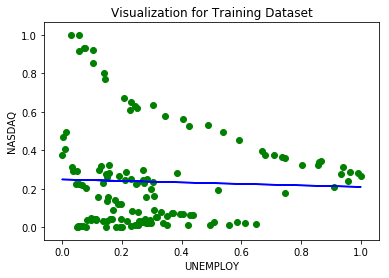

In [216]:
y_pred = model.predict(X_test) 

#Visualizing the Training Results 

plt.scatter(X_train, y_train, color= 'green')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title ("Visualization for Training Dataset")
plt.xlabel("UNEMPLOY")
plt.ylabel("NASDAQ")
plt.show()

**Step 7:** Visualizing the Test results

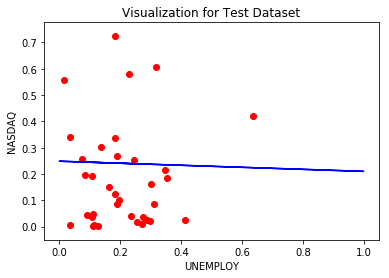

In [217]:
#Visualizing the Test Results 

plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title ("Visualization for Test Dataset")
plt.xlabel("UNEMPLOY")
plt.ylabel("NASDAQ")
plt.show()

**Prediction of NASDAQ index based on YIELD factor**

**Step 1:** Separate train and test data

In [0]:
X = stock_reg_data[['YIELD']]
y = stock_reg_data[['NASDAQ']]

#Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

#Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Step 2:** There are three steps to model the data with Linear Regression using sklearn

In [219]:
#Setup the model
model = LinearRegression()

#Use fit function
model.fit(X_train, y_train)

#Check the score
sc1 = model.score(X_test, y_test)
sc1

-0.012855727191005252

In [0]:
#Print X_test values
X_test

**Step 3:** After fitting the model, get the co-efficients

In [220]:
model.coef_    #Get the coefficients, beta

array([[0.10815947]])

**Step 4:** Get the intercept

In [221]:
model.intercept_  #Get the intercept, c

array([0.17631366])

In [222]:
y_predict = model.predict(X_test) 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.16460529006825245
Mean Squared Error: 0.03772571125642556
Root Mean Squared Error: 0.19423107695841457


**Step 5:** Predict unknown data

In [223]:
y_pred = model.predict(X_test) 
y_pred

array([[0.21685365],
       [0.24610137],
       [0.18503144],
       [0.25081121],
       [0.21167379],
       [0.24209309],
       [0.27782165],
       [0.17631366],
       [0.23896841],
       [0.26853018],
       [0.19757423],
       [0.23181582],
       [0.21348484],
       [0.23259824],
       [0.20804624],
       [0.23081258],
       [0.25572116],
       [0.24791861],
       [0.22480658],
       [0.23267885],
       [0.20529576],
       [0.22262987],
       [0.2271893 ],
       [0.22809816],
       [0.23290375],
       [0.21918263],
       [0.23767177],
       [0.23661382],
       [0.22573446],
       [0.26630533],
       [0.21476235],
       [0.2463898 ],
       [0.23879836],
       [0.22226971],
       [0.20866991]])

**Step 6:** Visualizing the Training results

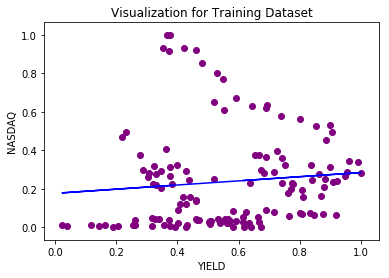

In [224]:
y_pred = model.predict(X_test) 

#Visualizing the Training Results 

plt.scatter(X_train, y_train, color= 'purple')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title ("Visualization for Training Dataset")
plt.xlabel("YIELD")
plt.ylabel("NASDAQ")
plt.show()

**Step 7:** Visualizing the Test results

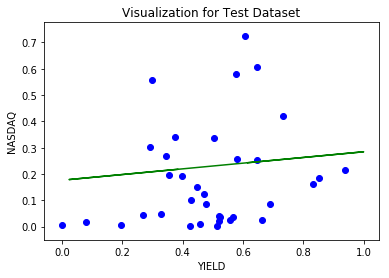

In [225]:
#Visualizing the Test Results 

plt.scatter(X_test, y_test, color= 'blue')
plt.plot(X_train, model.predict(X_train), color = 'green')
plt.title ("Visualization for Test Dataset")
plt.xlabel("YIELD")
plt.ylabel("NASDAQ")
plt.show()

**Data Enrichment Step**

**Now merge the  data set into recession factors data set to see the relation between real gdp and NASDAQ index**

In [231]:
#Get the required columns from GDP dataset
data_gdp_columns_required = data_gdp_records[['GDP']] 

#Get the required columns from recession factors dataset
data_recession_columns_required = data_records[['DATE','NASDAQ','UNEMPLOY','YIELD']]

frames = [data_recession_columns_required, data_gdp_columns_required]
#merged_data = pd.concat(frames, sort=False)

merged_data = X = pd.concat((data_recession_columns_required,data_gdp_columns_required), axis = 1)

merged_data

,DATE,NASDAQ,UNEMPLOY,YIELD,GDP
0,7/1/1976,0.000000,0.193368,0.583019,5965.265
1,10/1/1976,0.000005,0.200541,0.673182,6008.504
2,1/1/1977,0.000640,0.180965,0.640040,6079.494
3,4/1/1977,0.000695,0.148881,0.619450,6197.686
4,7/1/1977,0.001223,0.128127,0.513151,6309.514
5,10/1/1977,0.001282,0.109383,0.424892,6309.652
6,1/1/1978,0.001439,0.080972,0.427726,6329.791
7,4/1/1978,0.003372,0.052942,0.392140,6574.390
8,7/1/1978,0.004990,0.059144,0.317447,6640.497
9,10/1/1978,0.003675,0.050066,0.188703,6729.755


**Applying Linear Regression and predicting result after data enrichment**

**Prediction of NASDAQ index based on GDP factor**

**Scale GDP values**

**Step 1:** Separate train and test data

In [230]:
X = stock_reg_data[['GDP']]
y = stock_reg_data[['NASDAQ']]

#Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

#Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

KeyError: ignored

**Step 2:** There are three steps to model the data with Linear Regression using sklearn

In [0]:
#Setup the model
model = LinearRegression()

#Use fit function
model.fit(X_train, y_train)

#Check the score
#sc1 = model.score(X_test, y_test)
#sc1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for GDP is 0.71982416068565


In [0]:
sc1 = model.score(X_test, y_test)
sc1

0.7763416920738692

In [0]:
#Print X_test values
X_test

,GDP
92,0.512884
113,0.662029
19,0.071245
69,0.315964
53,0.252100
162,0.915930
108,0.614180
14,0.066809
99,0.561714
107,0.596295


**Step 3:** After fitting the model, get the co-efficients

In [0]:
model.coef_    #Get the coefficients, beta

array([[0.71982416]])

**Step 4:** Get the intercept

In [0]:
model.intercept_  #Get the intercept, c

array([-0.10390048])

In [0]:
y_predict = model.predict(X_test) 
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.07284112886771155
Mean Squared Error: 0.008330573168917617
Root Mean Squared Error: 0.09127197362234267


**Step 5:** Predict unknown data

In [0]:
y_pred = model.predict(X_test) 
y_pred

array([[ 0.26528611],
       [ 0.37264383],
       [-0.05261693],
       [ 0.1235382 ],
       [ 0.07756733],
       [ 0.55540804],
       [ 0.33820084],
       [-0.05580973],
       [ 0.3004345 ],
       [ 0.32532722],
       [-0.0606927 ],
       [-0.08492335],
       [ 0.39782111],
       [ 0.0286595 ],
       [ 0.42134516],
       [ 0.4361542 ],
       [ 0.47150182],
       [ 0.00237567],
       [ 0.18534324],
       [-0.01308546],
       [ 0.07281815],
       [ 0.15022208],
       [ 0.16360649],
       [ 0.14643337],
       [ 0.02280008],
       [ 0.20758284],
       [ 0.05455286],
       [-0.0281225 ],
       [-0.0640151 ],
       [ 0.31471483],
       [ 0.21308206],
       [ 0.51970414],
       [ 0.53509862],
       [-0.08491574],
       [ 0.27971781]])

**Step 6:** Visualizing the Training results

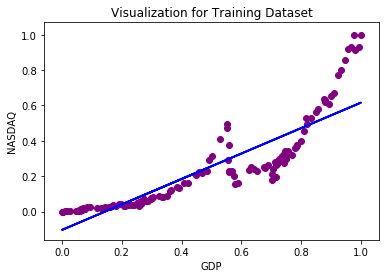

In [0]:
y_pred = model.predict(X_test) 

#Visualizing the Training Results 

plt.scatter(X_train, y_train, color= 'purple')
plt.plot(X_train, model.predict(X_train), color = 'blue', linewidth=2)
plt.title ("Visualization for Training Dataset")
plt.xlabel("GDP")
plt.ylabel("NASDAQ")
plt.show()

**Step 7:** Visualizing the Test results

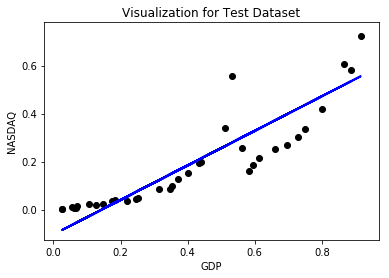

In [0]:
#Visualizing the Test Results 

plt.scatter(X_test, y_test, color= 'black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.title ("Visualization for Test Dataset")

plt.xlabel("GDP")
plt.ylabel("NASDAQ")

plt.show()

**Question:**
How does this improve the interpretability of your model? How does it add value to your business case?

-> After running Linear Regression on the newly added feature 'GDP' from merged dataset, the accuracy of the model is improved which is 0.78 and also the mean squared error is low - 0.008.
It is clearly interpreted from the model that whenever GDP goes down, NASDAQ index also goes down which indicates the probability of upcoming recession.
This adds value to our business case as we can predict clearly when the recession will occur from the GDP and NASDAQ growth trend.